## CARET

![gather](../fig/caret.jpg "title-1")

**CARET** is a package that we are going to use extensively in the next lessons. It provides a unified framework to build predictive models leveraging on the large list of packages belonging to the **R** ecosystem. 

Each one of these packages has its particular interface and to use it you have to adapt your code to this interface.  

**CARET** provides a standard interface with these packages and you have only to adapt your code to this unique interface: if you use **CARET** and you want to change the statistical methods / implementation used by your code, with **CARET** you should only have to change some parameters and your code will work out-of-the-box.

To use this package you have simply have to:

In [1]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.2"

You can retrieve all the models supported by **CARET** using the **getModelInfo** function, 

In [2]:
models <- getModelInfo()
names(models)
length(models)

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ORFlog"             
[139] "ORFpls"              "ORFridge"            "ORFsvm"             
[142] "ownn"                "pam"                 "parRF"              
[145] "PART"                "partDSA"             "pcaNNet"            
[148] "pcr"                 "pda"                 "pda2"               
[151] "penalized"           "PenalizedLDA"        "plr"                
[154] "pls"                 "plsRglm"             "polr"               
[157] "ppr"                 "PRIM"                "protoclass"         
[160] "pythonKnnReg"        "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         

[1] 238

**WOW** 238 models! Note that not all these models are implemented in **CARET** but the majority is implemented in an external library and you have to install the related package if you want to use it. The result of **getModelInfo** can be used to find which package you have to install to use a particular method:

In [3]:
models$kknn$label
models$kknn$library

[1] "k-Nearest Neighbors"

[1] "kknn"

So, if we want to use 'k-Nearest Neighbors' model we have to first install the **kknn** package. 

Ok nice, but how to fit a model with **CARET**?

In [4]:
model <- train(mpg ~ cyl, mtcars, method = "lm")
model

Linear Regression 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  3.33091  0.7626769  2.533383

Tuning parameter 'intercept' was held constant at a value of TRUE

Yes! But I want to use **kknn** not linear regression (that works with SAS too!)

In [5]:
model <- train(mpg ~ cyl, mtcars, method = "kknn")
model

k-Nearest Neighbors 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  kmax  RMSE      Rsquared   MAE     
  5     4.067662  0.7463487  3.259428
  7     3.754222  0.7518939  3.003995
  9     3.696745  0.7520571  2.953171

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were kmax = 9, distance = 2 and kernel
 = optimal.

Each model supported by **CARET** has its parameters you and not all these parameters are directly supported by the **CARET** interface. If you want to find which parameters can be set directly from **CARET** you can always explore the *getModelInfo()* results.

Here the parameters of **kknn**:

In [6]:
models$kknn$parameters

parameter,class,label
kmax,numeric,Max. #Neighbors
distance,numeric,Distance
kernel,character,Kernel


And here the ones of **lm**:

In [7]:
models$lm$parameters

parameter,class,label
intercept,logical,intercept


We can directly provide this parameters to the *train()* function using the *tuneGrid* parameter:

In [15]:
model <- train(mpg ~ cyl, mtcars, method = "kknn", 
               tuneGrid = data.frame(
                   kmax = 1, 
                   kernel = "inv", 
                   distance = 2
               )
)
model

k-Nearest Neighbors 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  4.23133  0.6758446  3.324631

Tuning parameter 'kmax' was held constant at a value of 1
Tuning
 parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of inv

In [17]:
model <- train(mpg ~ cyl, mtcars, method = "lm", 
               tuneGrid = data.frame(
                   intercept = FALSE
               )
)
model

Linear Regression 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE    Rsquared   MAE    
  11.268  0.7449431  9.46788

Tuning parameter 'intercept' was held constant at a value of FALSE

## TOY Datasets

In the following lessons we are going to use some simple datasets, that have been developed to challenge the simplest classification models.

These datasets will be generated leveraging some of the functions provided by the R package [**mlbench**](https://cran.r-project.org/web/packages/mlbench/index.html).

The full code to generate these datasets is contained the *.R* source file *src/lib.R*. Note that to correctly source this file you should set the working folder:

In [19]:
working_directory <- "../.."
setwd(working_directory)
source("src/lib.R")

Loading required package: tidyverse
Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.1     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.4.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.2"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.2"Warning message:
"package 'stringr' was built under R version 3.4.2"Warning message:
"package 'forcats' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
Loading required package: keras
Warning message:
"package 'keras' was bu

We can load all the datasets using the *get_full_dataset* function:

In [21]:
full_df <- get_full_dataset()
full_df %>% head

x,y,class,type
0.3379208,0.1796824,class_2,normal
0.2208795,0.1242232,class_2,normal
0.0000000,0.1762672,class_2,normal
0.8213051,0.6879283,class_1,normal
0.1573082,0.3488851,class_2,normal
0.7511982,0.8745081,class_1,normal


And we can plot its content using **ggplot**

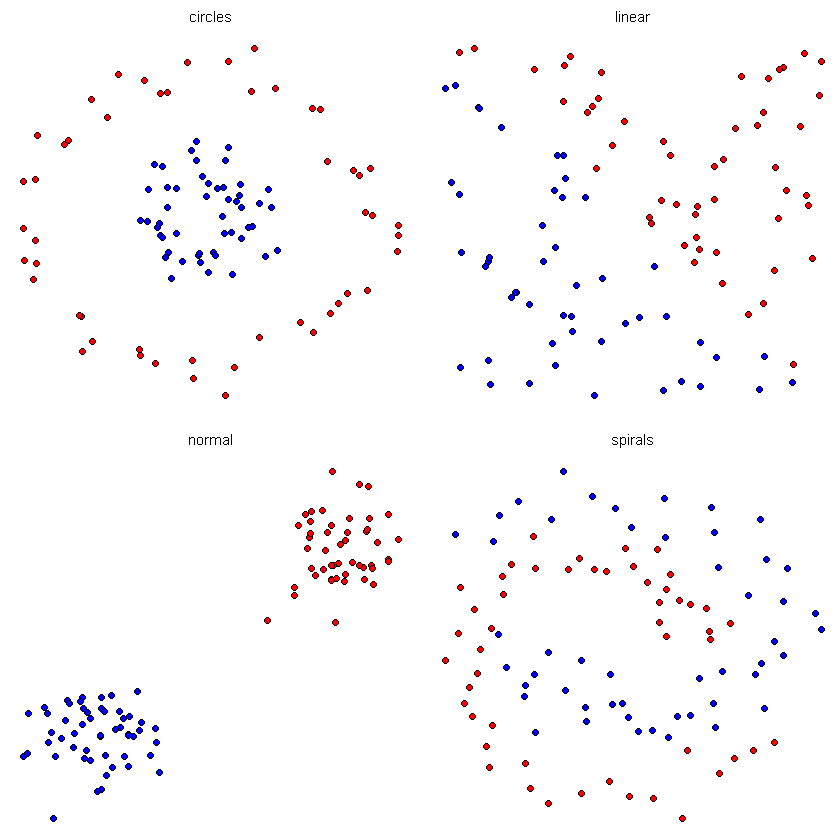

In [41]:
full_df %>% ggplot() + 
    geom_point(aes(x = x, y = y, fill = class), shape = 21) + 
    facet_wrap(~ type) + 
    theme_void() +
    labs(x = "", y = "") +
    scale_fill_manual(values = c("red", "blue")) + 
    guides(fill = F)